<a href="https://colab.research.google.com/github/Majid5654/Erwan-Majid_PCVK_Ganjil_2025/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**D. PRACTICAL**

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import glob
import math

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


/tmp/ipython-input-510427946.py:15: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


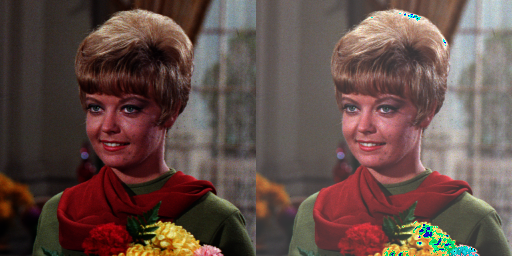

In [ ]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


**D1 PRACTICAL ASSIGNMENT**

1. Implement image inversion on Google Collaboratory using the formulas found in the
Theory Review section, resulting in the following output:

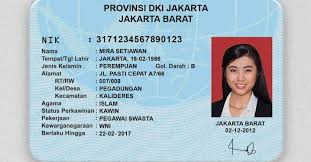

In [ ]:
imgktp = cv.imread('/content/drive/MyDrive/PCVK/KTP.jpg')
cv2_imshow(imgktp)

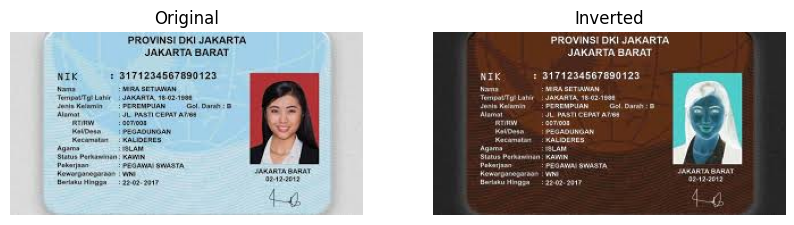

In [ ]:
imgrgb = cv.cvtColor(imgktp, cv.COLOR_BGR2RGB)
inverted_img = 255 - imgrgb

# Tampilkan hasil
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(imgrgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(inverted_img)
plt.title("Inverted")
plt.axis("off")

plt.show()

2. Implement the contrast transformation in Google Collaboratory using the formula found
in the Theory Review section for contrast, resulting in the following output:

This code first input brightnes than contrast same as question,but in modul contrast first then brightnes

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan nilai kontras [1.0 - 3.0]: 2


/tmp/ipython-input-3747558503.py:16: RuntimeWarning: overflow encountered in scalar add
  temp = original[y,x,c] + beta


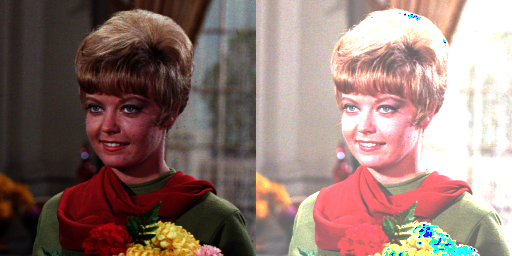

In [ ]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------')
try:
    beta = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
    alpha = float(input('Masukkan nilai kontras [1.0 - 3.0]: '))
except ValueError:
    print('Error, input tidak valid')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
result = np.zeros(original.shape, original.dtype)


for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            temp = original[y,x,c] + beta
            result[y,x,c] = np.clip(alpha * temp, 0, 255)

final_frame = cv.hconcat((original, result))
cv2_imshow(final_frame)

3. Implement the logarithmic brightness transformation in Google Collaboratory using the
formula found in the Theory Review section for log transformation, resulting in the
following output:

 Logarithmic Brightness Transformation 
----------------------------------
Masukkan nilai konstanta kecerahan (contoh 20): 40


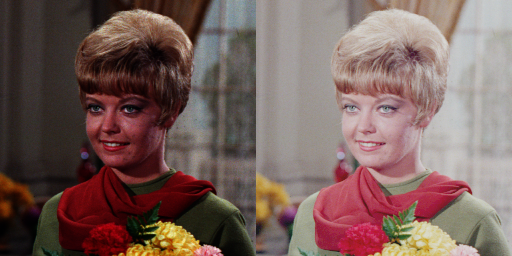

In [ ]:
print(" Logarithmic Brightness Transformation ")
print("----------------------------------")

try:
    c = float(input("Masukkan nilai konstanta kecerahan (contoh 20): "))
except ValueError:
    print("Error, input tidak valid")
    c = 1.0

# Baca gambar
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')

# Konversi ke float supaya log bisa jalan
log_img = (c * np.log(1 + original.astype(np.float32))).astype(np.uint8)

# Gabungkan hasil
final = cv.hconcat([original, log_img])
cv2_imshow(final)


4. Implement the grayscale transformation using the averaging, lightness, and luminance
methods on Google Collaboratory using the formulas found in the Theory Review
section, resulting in the following output:

A.Averaging

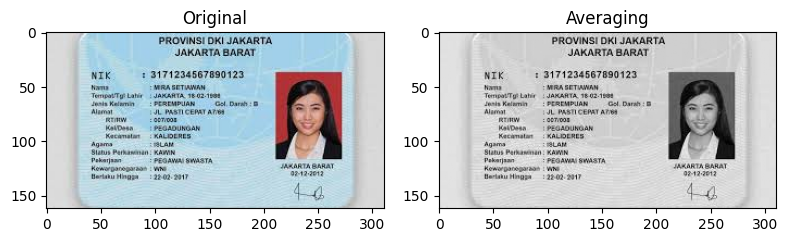

In [7]:
ktp = cv.imread('/content/drive/MyDrive/PCVK/KTP.jpg')
ktp = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)

B, G, R = cv.split(ktp)

gray_avg = ((R.astype(np.float32) + G.astype(np.float32) + B.astype(np.float32)) / 3).astype(np.uint8)

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(ktp)
plt.title("Original")
plt.axis()

plt.subplot(1, 2, 2)
plt.imshow(gray_avg, cmap="gray")
plt.title("Averaging")
plt.axis()

plt.tight_layout()
plt.show()

b. Lightness

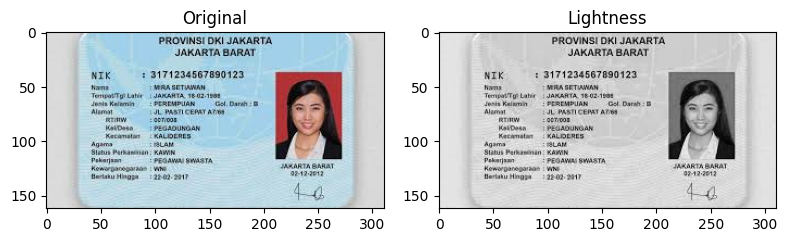

In [8]:

gray_lightness = ((np.maximum(np.maximum(R, G), B).astype(np.float32) +
                   np.minimum(np.minimum(R, G), B).astype(np.float32)) / 2).astype(np.uint8)

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(ktp)
plt.title("Original")
plt.axis()

plt.subplot(1, 2, 2)
plt.imshow(gray_lightness, cmap="gray")
plt.title("Lightness")
plt.axis()

plt.tight_layout()
plt.show()

c. Luminance

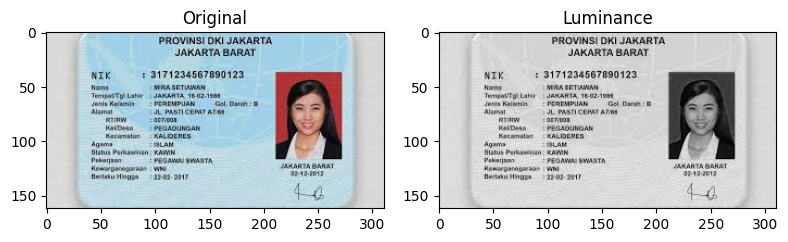

In [9]:
# Luminance
gray_luminance = (0.21 * R + 0.72 * G + 0.07 * B).astype(np.uint8)

# Show the result
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(ktp)
plt.title("Original")
plt.axis()

plt.subplot(1, 2, 2)
plt.imshow(gray_luminance, cmap="gray")
plt.title("Luminance")
plt.axis()

plt.tight_layout()
plt.show()

5. Display certain colors in an image and convert other colors to grayscale. For example,
display blue in the input image and convert other non-blue parts to grayscale, as in the
following example

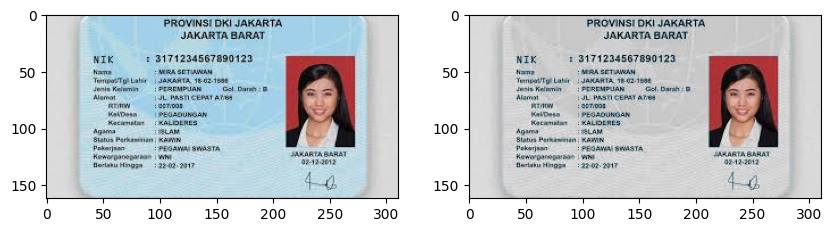

In [11]:
original = cv.imread('/content/drive/MyDrive/PCVK/KTP.jpg')
color_gray_ktp = np.zeros(original.shape, original.dtype)

for x in range(original.shape[0]):
  for y in range(original.shape[1]):
    b = int(original[x, y, 0])
    g = int(original[x, y, 1])
    r = int(original[x, y, 2])

    average_grayscale = (r+g+b)/3
    if(r < 250 and g > 0 and b > 200):
      color_gray_ktp[x, y] = average_grayscale
    else:
      color_gray_ktp[x, y] = original[x, y]

original_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)
color_gray_rgb = cv.cvtColor(color_gray_ktp, cv.COLOR_BGR2RGB)

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.imshow(original_rgb)
plt.axis()

plt.subplot(1,2,2)
plt.imshow(color_gray_rgb)
plt.axis()

plt.show()

1. Make Gamma Correction according to the following instructions

 Gamma Correction pada citra 
-----------------------------
Masukkan nilai Gamma: 3


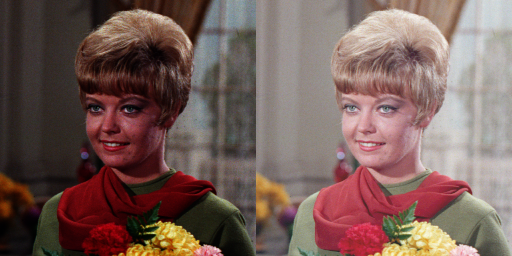

In [12]:
print(' Gamma Correction pada citra ')
print('-----------------------------')

try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')

fem = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')

gamma_corrected = np.array(255 * ((fem / 255) ** (1.0/gamma)), dtype='uint8')

final_frame_gamma = cv.hconcat([fem, gamma_corrected])
cv2_imshow(final_frame_gamma)

2. Create Image Depth Simulation

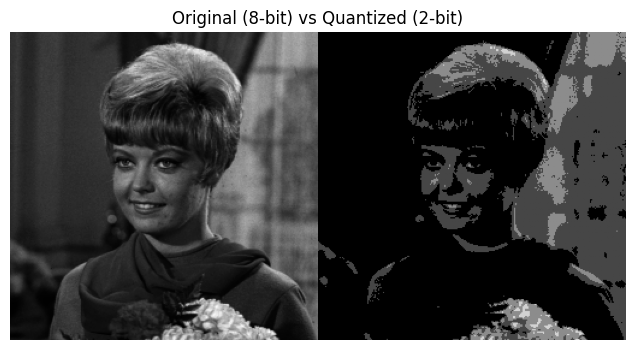

In [15]:
bit_depth = 2
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff',cv.IMREAD_GRAYSCALE)
levels = 2 ** bit_depth
step = 256 // levels

quantized = (original // step) * step
quantized = np.uint8(quantized)

# Gabungkan citra asli dan hasil quantisasi
final_image = cv.hconcat([original, quantized])

# Tampilkan hasil
plt.figure(figsize=(8,4))
plt.imshow(final_image, cmap='gray')
plt.axis("off")
plt.title(f"Original (8-bit) vs Quantized ({bit_depth}-bit)")
plt.show()


3. Create an Average Denoising module

In [ ]:
original = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)

# Load noisy images using glob (RGB)
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv.imread(img)
    n = cv.cvtColor(n, cv.COLOR_BGR2RGB)
    cv_img.append(n)

print(f"Total noisy images loaded: {len(cv_img)}")

# Function PSNR for RGB
def psnr(target, ref):
    mse = np.mean((target.astype(np.float32) - ref.astype(np.float32)) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    psnr = 20 * math.log10(PIXEL_MAX / math.sqrt(mse))
    return psnr

# Test average denoising with different N
N_values = [10, 20, 40, 80, 100]
results = []

for N in N_values:
    avg_img = np.zeros_like(original, dtype=np.float32)

    # Ambil N gambar pertama
    for i in range(N):
        avg_img += cv_img[i].astype(np.float32)

    avg_img /= N
    avg_img = np.uint8(avg_img)

    # Hitung PSNR
    psnr_value = psnr(original, avg_img)
    results.append((N, avg_img, psnr_value))

    # Tampilkan hasil
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1), plt.imshow(original), plt.title('Original')
    plt.subplot(1,2,2), plt.imshow(avg_img), plt.title(f'Average {N} images\nPSNR: {psnr_value:.2f} dB')
    plt.show()

# Cetak hasil ke tabel
print("No | Number of Images | PSNR (dB)")
print("----------------------------------")
for i, (N, _, psnr_val) in enumerate(results, start=1):
    print(f"{i}. | {N:<17} | {psnr_val:.2f}")